In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/Colab Notebooks/stock_shallow/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
from bs4 import BeautifulSoup
import requests 


# 2008-08-08  --> 2016-07-01 (DJIA)
DJIA_url =" https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"

html = requests.get(DJIA_url).content
df_list = pd.read_html(html)
table = df_list[1]
  

In [4]:
table.head()

,Company,Exchange,Symbol,Industry,Date Added,Notes
0,3M,NYSE,MMM,Conglomerate,1976-08-09,as Minnesota Mining and Manufacturing
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN
2,Apple,NASDAQ,AAPL,Information technologies,2015-03-19,NaN
3,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN
4,Caterpillar,NYSE,CAT,Construction and mining equipment,1991-05-06,NaN


In [0]:
tickers = [ticks for ticks in table['Symbol'].values]


In [6]:
import pandas_datareader as dr

prices_list = []
for ticker in tickers + ['DJIA']:
    try:
        # month / day / year
        prices = dr.DataReader(ticker,'yahoo','08/08/2006', '07/01/2016')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)

prices_df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-08-08,48.922359,42.517269,8.107023,56.609512,49.450542,42.266808,13.670687,12.367339,48.003578,129.538773,24.552576,53.489441,11.854515,43.249756,32.610165,23.376610,25.372568,18.126804,15.414352,40.748177,31.906466,42.572399,45.951839,16.044458,NaN,32.809586,38.019238,24.059736
2006-08-09,48.736828,42.346458,7.958097,56.107742,47.323334,42.442924,15.639458,12.350401,48.017437,128.307114,23.887451,53.532043,11.881832,43.086437,32.146278,22.844711,25.669777,18.201271,15.551131,40.625378,31.086502,42.193352,44.785965,16.183189,NaN,32.396332,37.280178,23.935202
2006-08-10,48.815338,42.281399,8.018168,55.409676,47.185215,42.361168,15.465509,12.392747,48.275032,129.692780,24.037638,53.780567,12.120831,43.242947,31.928829,23.183800,25.589272,18.216173,15.444085,41.116642,31.231636,40.832275,44.889938,16.235806,NaN,33.126911,37.723614,24.557871
2006-08-11,48.900959,42.134972,7.965609,55.235142,46.294273,42.675640,15.449696,12.353221,48.546558,129.247986,23.794474,53.595955,11.888660,43.188511,31.841854,23.064121,25.137302,18.193836,15.354885,41.116642,30.926863,40.978722,44.667152,16.297993,NaN,32.979332,37.669144,24.433338
2006-08-14,48.965164,42.134972,8.001902,54.820675,45.555286,42.172474,15.884565,12.418152,48.212372,128.615036,23.787321,54.448029,12.202779,43.487915,31.812862,23.084064,25.310661,18.268311,15.509512,40.775486,31.267910,41.056255,44.904774,16.226240,NaN,33.281887,37.855862,24.508060


In [7]:
prices_df.tail()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-27,154.736481,54.962376,87.594810,113.122253,65.719299,89.274033,24.800459,39.609848,78.992279,133.808823,116.247917,126.851845,28.350851,107.656143,53.092281,107.559929,50.612545,45.602867,30.296883,73.808037,103.014122,131.049988,90.704948,47.790005,71.829430,66.426682,74.245407,90.130371
2016-06-28,156.957687,55.181583,89.069954,114.219337,66.768906,90.403732,25.236351,39.971748,80.814629,136.590332,118.914703,128.796616,28.784605,109.207947,54.852486,109.594582,50.859615,46.553913,30.870554,74.925636,106.542839,132.579269,92.403145,47.859848,73.611938,66.435974,74.703659,91.725174
2016-06-29,158.743942,57.116432,89.840843,117.077377,68.343315,91.996017,25.663164,40.206985,82.192520,139.554062,118.765518,131.236389,29.467537,110.223999,56.400749,110.510185,52.204765,47.589706,31.381474,76.243164,109.044662,134.309280,93.746788,48.069378,75.159416,67.318565,77.799171,92.613304
2016-06-30,162.075790,58.198799,90.982880,119.732582,69.797997,93.250267,26.053648,41.012211,83.330376,142.508194,119.063904,134.171234,30.270441,112.043678,57.267029,111.296310,52.717209,48.182922,31.560749,76.933731,111.126434,134.959213,95.687614,48.750343,72.642342,67.838814,77.873985,93.415482
2016-07-01,162.464493,58.131741,91.258865,119.566628,70.387238,92.645378,26.153543,40.822208,83.419266,142.191666,120.863518,134.675110,30.224298,112.034454,56.895515,111.351799,53.019180,48.173504,31.883436,77.033676,110.949059,134.634216,95.855553,49.090824,72.945969,67.643723,77.677589,93.616013


In [8]:
stock_prices = path +"DJIA_table.csv"
stock_data = pd.read_csv(stock_prices, index_col = 0)

stock_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [10]:
len(stock_data['Adj Close'].values)#[-1: : -1])

1989

In [0]:
data = stock_data[['Adj Close', 'Close']].join(prices_df, how = 'inner')
data = data.drop(columns=['Close'])

In [0]:
data.rename(columns={'Adj Close':'DJIA'}, inplace=True)


In [13]:
data.head()

,DJIA,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11734.320312,55.016830,31.516310,21.218668,51.042561,50.899910,56.210686,19.173756,17.359442,56.447353,152.629959,19.902664,94.153969,17.261967,51.197498,31.772331,46.517620,23.787518,21.547157,13.049089,49.588322,33.675575,26.742601,51.345207,18.914530,14.411910,44.233196,28.912365,27.505789
2008-08-11,11782.349609,55.690693,32.649929,21.720510,50.109859,50.828129,55.997562,19.466299,17.340647,56.332001,154.408295,20.763079,92.538544,17.368832,51.276226,32.406700,46.715935,23.761061,21.370979,13.075394,49.445889,33.485939,26.958267,51.621677,19.302773,14.846648,44.768337,29.046839,28.167030
2008-08-12,11642.469727,55.106667,31.716366,22.117235,49.590836,51.553204,55.651257,19.371420,17.165205,55.409504,145.126434,20.740433,91.529823,17.468567,51.304836,29.335443,45.292145,23.933088,21.539503,12.970162,50.093956,33.015583,27.156679,51.076435,19.040298,14.451611,45.295826,29.347431,27.617432
2008-08-13,11532.959961,54.627487,30.749460,22.438858,48.334702,50.131752,57.436138,19.221191,17.296787,56.339230,143.044464,20.015873,91.953773,17.183599,50.947067,28.554083,44.470455,23.648565,21.378641,12.917546,49.566948,32.712132,27.268827,51.006981,18.783293,14.761090,44.426552,29.197140,27.256754
2008-08-14,11615.929688,54.687382,31.841394,22.441364,48.718323,50.461990,57.662567,19.505831,17.237259,55.820301,144.510513,20.506460,92.787064,17.354578,50.939907,29.250353,45.051308,23.780901,21.378641,13.009627,49.645279,33.015583,27.510376,51.022408,18.969208,15.130463,44.595432,29.394897,27.763420


In [0]:
data.to_csv(path + 'DJIA_data.csv')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(prices_df, train_size = 0.8, test_size = 0.2, shuffle = False)

X_train.head(), X_train.tail(), X_test.head(), X_test.tail()

(                  MMM        AXP      AAPL  ...        WMT        WBA        DIS
 Date                                        ...                                 
 2006-08-08  48.922359  42.517269  8.107023  ...  32.809586  38.019238  24.059736
 2006-08-09  48.736828  42.346458  7.958097  ...  32.396332  37.280178  23.935202
 2006-08-10  48.815338  42.281399  8.018168  ...  33.126911  37.723614  24.557871
 2006-08-11  48.900959  42.134972  7.965609  ...  32.979332  37.669144  24.433338
 2006-08-14  48.965164  42.134972  8.001902  ...  33.281887  37.855862  24.508060
 
 [5 rows x 28 columns],
                    MMM        AXP       AAPL  ...        WMT        WBA        DIS
 Date                                          ...                                 
 2014-07-03  127.871758  88.755074  86.180794  ...  66.660011  66.725426  80.896980
 2014-07-07  127.432114  88.347610  87.958870  ...  66.941620  66.364647  80.664085
 2014-07-08  127.124306  87.578957  87.390602  ...  67.452019  6

In [25]:
len(X_train.loc['2013-07-17':])

248

In [0]:
import pandas as pd
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#Calculate average annual percentage return and volatilities over a theoretical one year period

returns = X_train.loc['2013-07-17':].pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = X_train.pct_change().std() * sqrt(252)

In [27]:
returns.head()

,Returns,Volatility
MMM,0.265116,0.235151
AXP,0.238220,0.432370
AAPL,0.496931,0.349748
BA,0.234308,0.304140
CAT,0.286120,0.352561


Text(0.5, 1.0, 'Elbow curve')

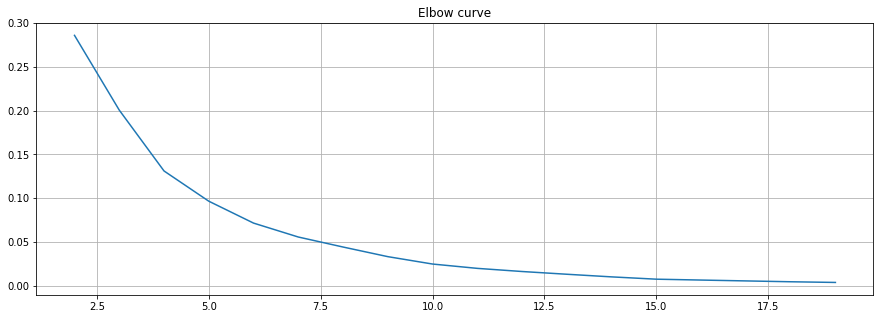

In [28]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

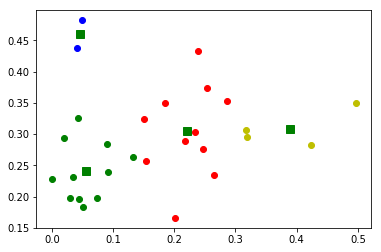

In [38]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,4)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)


In [39]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

[details[i] for i in range(5)]

[('MMM', 2), ('AXP', 2), ('AAPL', 1), ('BA', 2), ('CAT', 2)]

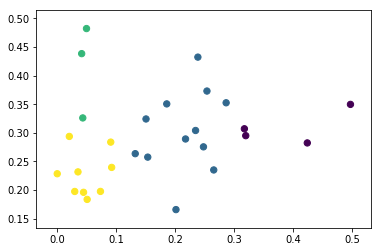

In [40]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

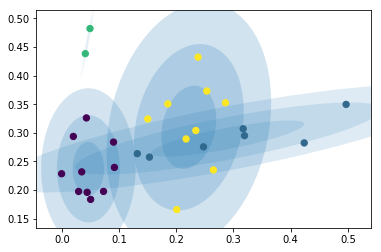

In [41]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
plot_gmm(gmm, X)

In [0]:
prob = gmm.predict_proba(X)

In [43]:
np.argmax(prob, axis = 0)

array([ 6,  2, 14,  1])

In [44]:
np.max(prob, axis=0)

array([0.99861019, 0.99999962, 0.9999993 , 1.        ])

In [45]:
[labels[idx] for idx in np.argmax(prob, axis = 0)]

[2, 0, 2, 1]

In [46]:
[prices_df.columns[idx] for idx in np.argmax(prob, axis = 0)]

['CSCO', 'AAPL', 'JPM', 'AXP']

In [0]:
table = table.set_index('Symbol')


,Company,Exchange,Symbol,Industry,Date Added,Notes
0,3M,NYSE,MMM,Conglomerate,1976-08-09,as Minnesota Mining and Manufacturing
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN
2,Apple,NASDAQ,AAPL,Information technologies,2015-03-19,NaN
3,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN
4,Caterpillar,NYSE,CAT,Construction and mining equipment,1991-05-06,NaN


In [68]:

chosen_portfolio = [prices_df.columns[idx] for idx in np.argmax(prob, axis = 0)]

for val in chosen_portfolio:

    print("{:20} ({:5}): Industry: {}".format(table.loc[val]['Company'], val, table.loc[val]['Industry']))
    
    

Cisco Systems        (CSCO ): Industry: Information technologies
Apple                (AAPL ): Industry: Information technologies
JPMorgan Chase       (JPM  ): Industry: Financial services
American Express     (AXP  ): Industry: Financial services


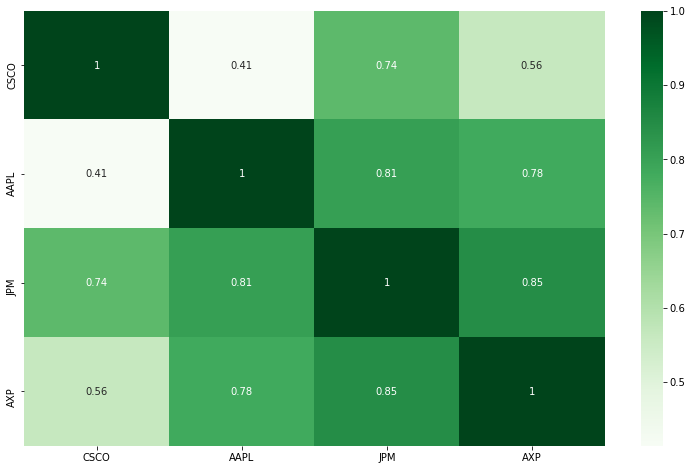

In [70]:
import seaborn as sns 

corr = prices_df[chosen_portfolio].corr()

plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap="Greens")

In [0]:

df = pd.read_csv(path + "DJIA_data.csv", index_col = 0 )
__X_train_, __X_test_ = train_test_split(df, train_size = 0.8, test_size = 0.2, shuffle = False)


vis = __X_train_.loc['2013-07-17':]

vis_df = vis[chosen_portfolio + ["DJIA"]] / df[chosen_portfolio + ["DJIA"]].iloc[0].values

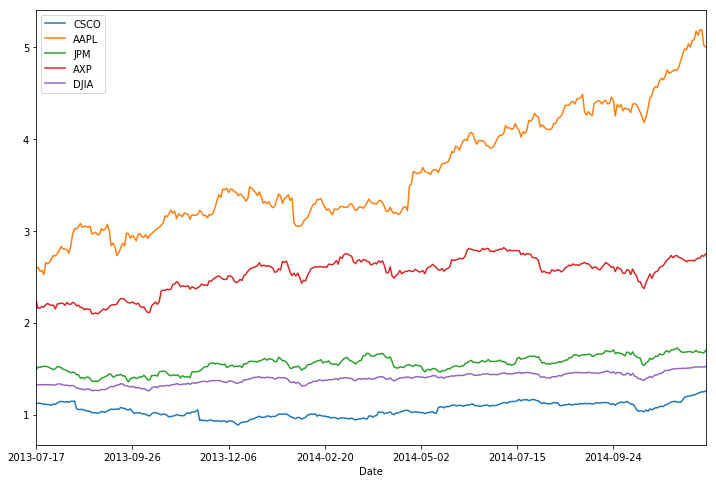

In [101]:
vis_df.plot(figsize = (12, 8))

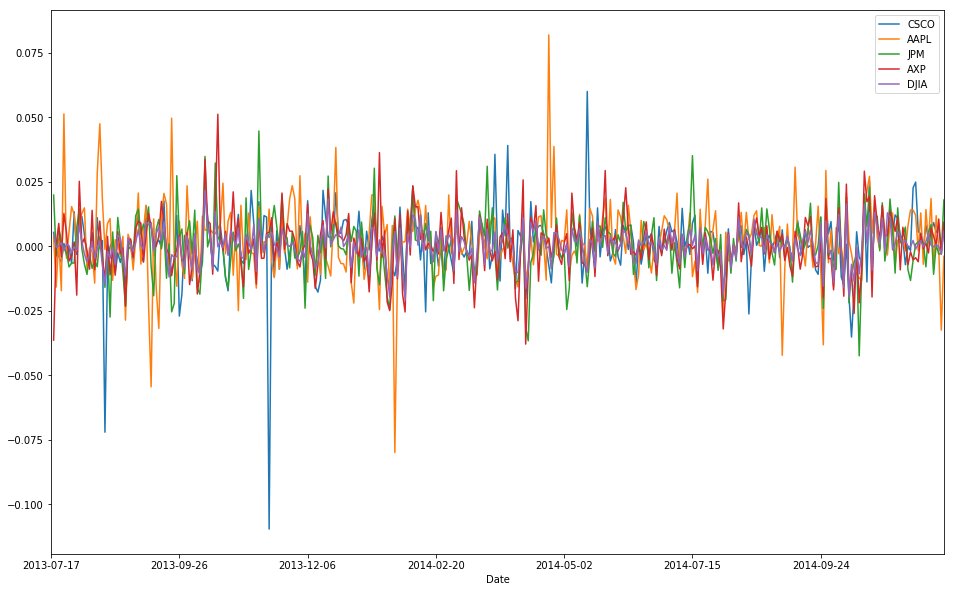

In [109]:
returns = vis[chosen_portfolio + ["DJIA"]].pct_change()

returns.plot(figsize = (16, 10))


In [0]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

We will generate 25,000 random portfolios. Finally, the risk-free rate has been taken from U.S. Department of The Treasury. The rate of 1.78% is the 52week treasury bill rates at the start of 2018. The rationale behind this is that the historical price data is from 2016~2017, and if I assume that I implement this analysis at the start of 2018, the most updated Treasury bill rate is from the start of 2018. And I also chose 52weeks treasury bill rates to match with the annualised return and risk I calculated.

In [0]:
returns = vis[chosen_portfolio].pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [0]:
import scipy.optimize as sco

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var
  
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result
  
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients
  
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=vis[chosen_portfolio].columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=vis[chosen_portfolio].columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(vis[chosen_portfolio].columns):
        print (txt,":","annualised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(vis[chosen_portfolio].columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.43
Annualised Volatility: 0.19


            CSCO   AAPL  JPM    AXP
allocation  2.37  79.92  0.0  17.71
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.13


            CSCO   AAPL    JPM    AXP
allocation  26.1  24.13  27.13  22.65
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

CSCO : annualised return 0.1 , annualised volatility: 0.2
AAPL : annualised return 0.5 , annualised volatility: 0.22
JPM : annualised return 0.11 , annualised volatility: 0.18
AXP : annualised return 0.16 , annualised volatility: 0.18
--------------------------------------------------------------------------------


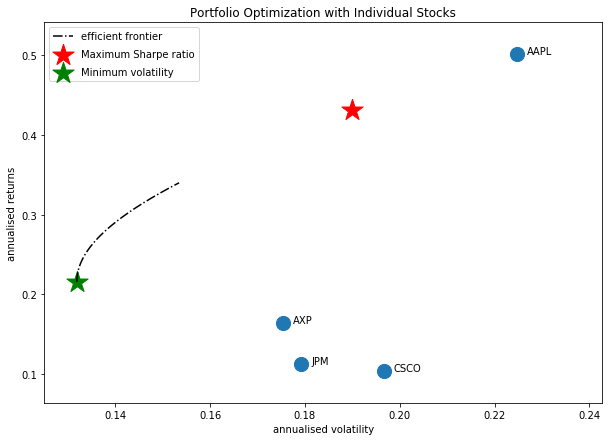

In [183]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)


In [0]:
__X_train_, __X_test_ 

In [184]:
vis.head(), __X_test_.tail()

(                    DJIA         MMM  ...        WBA        DIS
 Date                                  ...                      
 2013-07-17  15470.519531   98.513275  ...  43.708534  60.144466
 2013-07-18  15548.540039   99.235092  ...  44.420467  60.567760
 2013-07-19  15543.740234   99.845215  ...  44.481979  59.960438
 2013-07-22  15545.549805   99.922554  ...  45.053280  59.261078
 2013-07-23  15567.740234  100.326447  ...  44.833546  59.307087
 
 [5 rows x 29 columns],
                     DJIA         MMM  ...        WBA        DIS
 Date                                  ...                      
 2016-06-27  17140.240234  154.736481  ...  74.245407  90.130371
 2016-06-28  17409.720703  156.957687  ...  74.703659  91.725174
 2016-06-29  17694.679688  158.743942  ...  77.799171  92.613304
 2016-06-30  17929.990234  162.075790  ...  77.873985  93.415482
 2016-07-01  17949.369141  162.464493  ...  77.677589  93.616013
 
 [5 rows x 29 columns])